In [2]:
import os
import dpkt
import cv2
import numpy as np
import pandas as pd
import math

In [3]:
from sklearn.cluster import DBSCAN
from DataReader import LidarLoader

In [4]:

from DetectedObject import DetectedObject
from LidarDBSCAN import AdaptiveDBSCAN

In [5]:

class FrameGen():
    def __init__(self,frame_path,detecting_range,bck_voxel_path,with_bf = True):
        self.frame_path = frame_path
        self.bck_voxel_path = bck_voxel_path
        self.with_bf = with_bf
        self.detecting_range = detecting_range
        
    def extract_frame_dic(self,point_cloud,Adb):
        if len(point_cloud) == 0:
            return {}
        label = Adb.fit_predict(point_cloud)# cluster part point_cloud: 2D array [[2.1,2.3],[2.2,3.4],[x,y],[100,121]] label:[0,0,1,-1]
        uniq_label = np.unique(label)
        if -1 in uniq_label:
            uniq_label = uniq_label[uniq_label!=-1]
        frame_dic = {}
        for ind in range(len(uniq_label)):
            include_point = point_cloud[label == uniq_label[ind]].astype(np.float32)[:,[0,1]]
            rect = cv2.minAreaRect(include_point)
            center = rect[0]
            box_corner = cv2.boxPoints(rect)
            elevation_intensity = point_cloud[label == uniq_label[ind]].astype(np.float32)[:,[3,4]]
            detected_obj = DetectedObject(np.array(center),include_point,box_corner,elevation_intensity)
            frame_dic[ind] = detected_obj

        return frame_dic #next_frame

    def DBSCAN_pcap_frame_generator(self,eps,min_samples):
        db = DBSCAN(eps=eps,min_samples=min_samples)
        lidar_reader = LidarLoader(self.frame_path,self.bck_voxel_path,self.detecting_range,self.with_bf)
        frame_gen = lidar_reader.frame_gen()
        while True:
            while True:
                point_cloud = next(frame_gen)[:,[1,2,4,3,5]] # X,Y,D,Z,I
                frame_dic = self.extract_frame_dic(point_cloud,db)
                yield frame_dic

    def ADBSCAN_pcap_frame_generator(self,beta,min_sample_1,min_sample_2,min_sample_3):
        Adb = AdaptiveDBSCAN(beta,min_sample_1,min_sample_2,min_sample_3)
        lidar_reader = LidarLoader(self.frame_path,self.bck_voxel_path,self.detecting_range,self.with_bf)
        frame_gen = lidar_reader.frame_gen()
        while True:
            while True:
                point_cloud = next(frame_gen)[:,[1,2,4,3,5]] # X,Y,D,Z,I
                frame_dic = self.extract_frame_dic(point_cloud,Adb)
                yield frame_dic

In [8]:
# reset frame gen
frame_gen = FrameGen(pcap_file_path,detecting_range,bck_voxel_path,with_bf=False).DBSCAN_pcap_frame_generator(eps,min_samples)
frame_ind = 1 # keep track of the frame number 

NameError: name 'detecting_range' is not defined

In [47]:
# compare the future iterations of frame gen

future= 10 

frame_gen = FrameGen(pcap_file_path,detecting_range,bck_voxel_path,with_bf=False).DBSCAN_pcap_frame_generator(eps,min_samples)

#nframe_gen = frame_gen
for i in range(0, future):
    nframe_gen = next(frame_gen)
    
pc = nframe_gen[0].point_cloud
#print("point cloud is", pc)
print("pc of 0", pc[0])


frame_gen = FrameGen(pcap_file_path,detecting_range,bck_voxel_path,with_bf=False).DBSCAN_pcap_frame_generator(eps,min_samples)
#nframe_gen1 = frame_gen
for i in range(0, future):
    nframe_gen1 = next(frame_gen)

pc1 = nframe_gen1[0].point_cloud
#print("point cloud is", pc1)
print("pc of 0", pc1[0])


pc of 0 [ 6.173654 12.940429]
pc of 0 [ 6.173654 12.940429]


In [20]:
# print length
next_frame = next(frame_gen)
print("len of next frame", len(next_frame))

len of next frame 41


In [7]:
pcap_file_path = 'C:/Users/super/OneDrive/Documents/2021/Lidar/bf1VER2.pcap'

In [10]:
#pcap_file_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/USA pkwy/2019-12-18-10-0-0-BF1(0-18000frames).pcap'

#pcap_file_path = 'C:/Users/super/OneDrive/Documents/2021/Lidar/2019-9-10-12-0-0-BF1(0-18000frames).pcap'
pcap_file_path = 'C:/Users/super/OneDrive/Documents/2021/Lidar/bf1VER2.pcap'
detecting_range = 40 #meter
bck_voxel_path = 0
eps = 1
min_samples = 7
frame_gen = FrameGen(pcap_file_path,detecting_range,bck_voxel_path,with_bf=False).DBSCAN_pcap_frame_generator(eps,min_samples)


for i in range(20):
    print("i is", i)
    #print("len of next frame", len(next_frame))
    next_frame = next(frame_gen)
    pc = next_frame[0].point_cloud
    #print("point cloud is", pc)
    print("pc of 0", pc[0])
    p0 = pc[0]
    print("p0", p0[0])
    print("p1", p0[1])
    print("pc of 1", pc[1])
    

i is 0
pc of 0 [15.936194 15.274921]
p0 15.936194
p1 15.274921
pc of 1 [15.763097 14.929889]
i is 1
pc of 0 [19.23621  15.826119]
p0 19.23621
p1 15.826119
pc of 1 [19.207716 15.487606]
i is 2
pc of 0 [22.742737 15.458849]
p0 22.742737
p1 15.458849
pc of 1 [22.723654 15.330183]
i is 3
pc of 0 [25.961637 14.907508]
p0 25.961637
p1 14.907508
pc of 1 [25.940649  14.7752905]
i is 4
pc of 0 [29.432106 14.612625]
p0 29.432106
p1 14.612625
pc of 1 [29.421644  14.4804325]
i is 5
pc of 0 [32.80093  14.586769]
p0 32.80093
p1 14.586769
pc of 1 [32.785797 14.443175]
i is 6
pc of 0 [-0.9845777 11.938175 ]
p0 -0.9845777
p1 11.938175
pc of 1 [-0.98876965 12.049977  ]
i is 7
pc of 0 [ 0.19613509 11.890681  ]
p0 0.19613509
p1 11.890681
pc of 1 [ 0.23756053 11.8859415 ]
i is 8
pc of 0 [ 3.1797786 13.178848 ]
p0 3.1797786
p1 13.178848
pc of 1 [ 2.9939077 12.109148 ]
i is 9
pc of 0 [ 6.173654 12.940429]
p0 6.173654
p1 12.940429
pc of 1 [ 6.1453986 12.768483 ]
i is 10
pc of 0 [ 9.278899 12.624763]
p0 9.2788

In [11]:
# step 1
ind_temp = 0
xmin=-200
ymin=-200
xmax= 200
ymax=200
forwardmap={}
backmap={}
for ix in range(int(xmin), int(xmax)):
    for iy in range(int(ymin), int(ymax)):
        myvec = []
        myvec.append(ix)
        myvec.append(iy)
        forwardmap[ind_temp] = myvec
        backmap[(ix, iy)]= ind_temp
        ind_temp=ind_temp+1

In [9]:
forwardmap[10]

[-200, -190]

In [62]:
# run algorithm on input

# test initializing

import csv
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np


# december highest 
# step 4 b 


class frequency_grid(object):
    
    def __init__(self): # initialize forward and back map outside of init
        #self.numpoints = numpoints
        self.time_elapsed= 0 # same as index
        self.numcells = 160000
        
        self.thres = 10 # for hybrid 2 method
        self.angles = [] 
        
        self.xmin =-200
        self.xmax = 200
        self.ymin =-200
        self.ymax =200
        
        self.continueboolean = True # boolean
        
        self.forwardmap = {}  # dcmap1
        self.backmap = {}
        
        ind_temp = 0
        for ix in range(int(self.xmin), int(self.xmax)):
            for iy in range(int(self.ymin), int(self.ymax)):
                myvec = []
                myvec.append(ix)
                myvec.append(iy)
                self.forwardmap[ind_temp] = myvec
                self.backmap[(ix, iy)]= ind_temp
                ind_temp=ind_temp+1
                
        self.countmap = {}
        
        self.current_xposition=[]
        self.current_yposition=[]
        self.current_position = []
        self.prevmap = {} # set to current map at end of frame 
        self.currentmap = {}
        
        self.tracking_list = {} # list of objects that are tracked 
        
        self.range = 10
        
        # initialize grid count map
        self.countmap = {}
        
        # tracked array?
        self.trackinglist = {}
        # self positions in (x,y)
        self.xposition = []
        self.yposition = []
        self.position = [] 
        
        self.ax = [] # average x position
        self.ay = [] # average y position
        self.angles = []
    
        
    # set up based on trajectories file : training method 
    def setup_grid(self): 
        
        fileind = 1
        for filename in os.listdir('24hrdata'):
            print("file", filename)
            fname = '24hrdata/'+filename
            fileind =fileind+1
            #irow=0
            obnum=1
            with open(fname) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')
                line_count = 0
                for row in csv_reader:
                    trajectory_num = row[0]
                    if line_count==0:
                        line_count = line_count+1 # skip header
                        continue
                    if line_count==1:
                        prevrow = row
                        prevx = float(prevrow[6])
                        prevy = float(prevrow[7])
                        pfx = round(prevx)
                        pfy = round(prevy)
                        line_count = line_count+1
                        continue
                    currentx = float(row[6])
                    currenty = float(row[7])
                    fx = round(currentx)
                    fy = round(currenty)
                    if pfx == fx and pfy ==fy:
                        #prevframe = frameindex
                        continue
                    if obnum != trajectory_num:
                        pfx = fx
                        pfy = fy
                        obnum = trajectory_num
                        continue
                    #save
                    fromi = self.backmap[(pfx, pfy)]
                    toi = self.backmap[(fx, fy)]
                    #print("fromi is", fromi)
                    #print("toi is", toi)
                    if abs(pfx - fx)>10 or abs(pfy - fy)>10:
                        continue
                    # check if it is none 
                    val = self.countmap.get((fromi, toi))
                    if val == None:
                        #print("none val for fromi", fromi,"to toi ", toi)
                        self.countmap[(fromi, toi)] = 1
                    else:
                        
                        mcount = self.countmap[(fromi, toi)]
                        self.countmap[(fromi, toi)] = mcount+1
                        # check by printing
                        if mcount >600:
                            print("countmap from i: ", fromi, " toi:", toi)
                    pfx=fx
                    pfy=fy
    
    def highestfreq(self, fromi):
        highest = 0
        indexhighest = fromi
        (px, py) = self.forwardmap[fromi]
        for j in range(-10, 11):
            jx = px+j
            if jx>self.xmax-1 or jx<self.xmin: # check if pts in range
                continue
            for k in range(-10, 11):
                jy = py+k
                # check if pts are in range
                if jy>self.ymax-1 or jy<self.ymin:
                    continue
                toi = self.backmap[(jx, jy)]
                # check if value is none 
                val = self.countmap.get((fromi, toi))
                if val == None:
                    t = 0
                else:
                    t = self.countmap[(fromi, toi)]
                #if t>0:
                    #print(t)
                if t > highest:
                    highest=t
                    indexhighest=toi
        return highest, indexhighest

    def set_first_coordinates(self, frame_gen, init_cluster):
        # update the first position
        first_frame = frame_gen #next(frame_gen) change it to not have next, to be consistent
        #lenframe = len(first_frame)
        ptcloud = first_frame[init_cluster].point_cloud
        xvals = []
        yvals = []
        currentmap={}
        for p in ptcloud:
            px =p[0]
            py =p[1]
            xvals.append(px)
            yvals.append(py)
            # set prevmap 
            xr = round(px)
            yr = round(py)
            fromi = self.backmap[(xr, yr)]
            h1, i1 = self.highestfreq(fromi)
            currentmap[i1] = 1
            
        self.prevmap = currentmap
        #change to set equal to 
        self.xposition= [xvals]
        self.yposition= [yvals]
        self.current_xposition = xvals
        self.current_yposition = yvals
        
        
        self.ax = [np.mean(xvals)]
        self.ay = [np.mean(yvals)]
        print(" self ax set ", self.ax)
        
        self.trackinglist[0] = init_cluster
        self.continueboolean = True
        
        
    
    def predict(self, frame_gen): # ind: current index
        
        
        # frame gen is 
        next_frame = frame_gen #next(frame_gen)
        #print("len of next frame", len(next_frame))
        lenframe = len(next_frame)
        mf = defaultdict(list)
        
        mx = lenframe
        for j in range(0, mx):
            mf[j] = 0
            
        matchfreq = mf
        
        f= 0
        currentmap = {} # temporary currentmap
        currentmap_freq = {} # holds freq scores
        totalmap = {}
        
        xvalues=[]
        yvalues=[]
        hxvalues = []
        hyvalues = []
        
        
        for i in range(0, lenframe):
            xvalues= []
            yvalues=[]
            # reset current map
            currentmap={}
            #if i>1:
            #    break # test out 
            ptcloud = next_frame[i].point_cloud
            for p in ptcloud:
                # extract x and y values
                px =p[0]
                py =p[1]
                xvalues.append(px)
                yvalues.append(py)
                #print("pc of x", px)
                #print("pc of y", py)
                xr = round(px)
                yr = round(py)
                fromi = self.backmap[(xr, yr)]
                h1, i1 = self.highestfreq(fromi)
                # save to map
                currentmap[i1] = 1
                currentmap_freq[i1] = h1 
                val = self.prevmap.get(fromi)
                #print("prevmap value is", val)
                if val ==None:
                    pass
                else:
                    matchfreq[i] = matchfreq[i] +1
            if matchfreq[i] > f:
                ky = i
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky]= currentmap
                
                
        if len(hxvalues)==0:
            print("did not find next")
            self.continueboolean = False
            
        else:
            print("found next: key as :", ky)
            # return ky
            self.trackinglist[self.time_elapsed] = ky 
            self.prevmap = totalmap[ky] #currentmap
            print("cluster found is :", ky)
            self.xposition.append(hxvalues)
            self.yposition.append(hyvalues)
            #plt.scatter(hxvalues, hyvalues)
            #plt.show()
                #return ky
        self.time_elapsed = self.time_elapsed+1

        # distance predict method
    def dist_predict(self, frame_gen): # ind: current index
        # frame gen is 
        next_frame = next(frame_gen)
        lenframe = len(next_frame)
        
        m=1000
        t = self.time_elapsed
        avx = np.mean(self.xposition[t-1])
        avy = np.mean(self.yposition[t-1])
        
        for i in range(0, lenframe):
            #if i>1:
            #    break # test out 
            ptcloud = next_frame[i].point_cloud
            xvalues=[]
            yvalues =[]
            currentdistances=[]
            for p in ptcloud:
                # extract x and y values
                xpoint =p[0]
                ypoint =p[1]
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                # calc distance
                dx1 = avx - xpoint
                dy1 = avy - ypoint
                d1 = pow(dx1, 2) + pow(dy1, 2)
                dist = pow(d1, 0.5)
                currentdistances.append(dist)
            # at the end of current cluster 
            meandistances = np.mean(currentdistances)
            if meandistances < m:
                m = meandistances
                ky = i
                hxvalues = xvalues
                hyvalues = yvalues
                
        self.xposition.append(hxvalues)
        self.yposition.append(hyvalues)
        self.trackinglist[self.time_elapsed] = ky 
        self.time_elapsed= self.time_elapsed+1
    # hybrid predict method
    def hybrid_predict(self, frame_gen):
        
        # frame gen is 
        next_frame = frame_gen #next(frame_gen)
        #print("len of next frame", len(next_frame))
        lenframe = len(next_frame)
        mf = defaultdict(list)
        
        mx = lenframe
        for j in range(0, mx):
            mf[j] = 0
            
        matchfreq = mf
        
        f= 0
        currentmap = {} # temporary currentmap
        currentmap_freq = {} # holds freq scores
        totalmap = {}
        
        xvalues=[]
        yvalues=[]
        hxvalues = []
        hyvalues = []
        
        currentmap3 = {} # average coordinates
        
        for i in range(0, lenframe):
            xvalues= []
            yvalues=[]
            # reset current map
            currentmap={}
            #if i>1:
            #    break # test out 
            ptcloud = next_frame[i].point_cloud
            for p in ptcloud:
                # extract x and y values
                px =p[0]
                py =p[1]
                xvalues.append(px)
                yvalues.append(py)
                #print("pc of x", px)
                #print("pc of y", py)
                xr = round(px)
                yr = round(py)
                fromi = self.backmap[(xr, yr)]
                h1, i1 = self.highestfreq(fromi)
                # save to map
                currentmap[i1] = 1
                currentmap_freq[i1] = h1 
                val = self.prevmap.get(fromi)
                #print("prevmap value is", val)
                if val ==None:
                    pass
                else:
                    matchfreq[i] = matchfreq[i] +1
            if matchfreq[i] > f:
                ky = i
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky]= currentmap
                
        numo2 = float(i) # clusterid 
        avecurrentx = np.mean(xvalues) ##USE AS CURRENT X
        avecurrenty = np.mean(yvalues)
        currentmap3[numo2] = [avecurrentx, avecurrenty]   
        thres = 10 # distance threshold
        if len(hxvalues)==0:
            print("did not find next")
            foundmin=0
            mindist = thres
            c_first=0
            for c in currentmap3:
                cvalue = currentmap3[c]
                cx = cvalue[0]
                cy = cvalue[1]
                print("self ax is ", self.ax)
                ax = self.ax[-1]#finalx[-1]
                ay = self.ay[-1] #finaly[-1]
                dist1 = pow(cx - ax,2) + pow(cy - ay,2)
                dist = math.sqrt(dist1)
                if dist < thres:
                    if c_first==0:
                        c_first=1
                        minclust=c
                        mcx = cx
                        mcy= cy
                        mindist = dist
                    foundmin=1
                    if dist< mindist:
                        mindist = dist
                        minclust=c
                        mcx = cx
                        mcy = cy
            if foundmin==1:
                print("found min")
                print("dist found is", mindist)
                if len(self.angles)==0:
                    # prevmap = totalmap[minclust]
                    avx = mcx
                    avy = mcy
                    #add to angles
                    xdiff = avx - self.ax[-1] #np.mean(self.xposition[-1]) #finalx[-1]
                    ydiff= avy - self.ay[-1] #np.mean(self.yposition[-1]) #finaly[-1]
                    # check initial direction
                    if avy > 20: # +y, -x
                        if xdiff>0 and ydiff<0:
                            print("wrong initial direction ")
                            return
                    if avy < 20:
                        if xdiff<0 and ydiff>0:
                            print("wrong initial direction")
                            return # break
                    rad = math.atan2(ydiff,xdiff)
                    ang = math.degrees(rad)
                    self.trackinglist[self.time_elapsed] = minclust
                    if ang<0:
                        ang= 360+ang
                    self.angles.append(ang)
                    self.ax.append(mcx)
                    self.ay.append(mcy)
                    
                    return #continue
                prev_avex = self.ax[-1]
                prev_avey = self.ay[-1]
                xdiff_curr = mcx - prev_avex
                ydiff_curr = mcy - prev_avey
                
                if mcy > 20:
                    if xdiff_curr>0 and ydiff_curr<0:
                        return #break
                if mcy <20:
                    if xdiff_curr<0 and ydiff_curr>0:
                        return #break
                # angle 
                rad = math.atan2(ydiff_curr, xdiff_curr)
                ang= math.degrees(rad)
                if ang<0:
                    ang = 360+ang
                prev_ang = self.angles[-1]
                ang_diff = abs(ang - prev_ang)
                print("angle diff is", ang_diff)
                if ang_diff <= 30: 
                    print("angle holds")
                    self.trackinglist[self.time_elapsed]=minclust
                    self.prevmap = totalmap[minclust]
                    self.ax.append(mcx)#avx = mcx
                    self.ay.append(mcy)#avy = mcy
                    self.angles.append(ang)
                else:
                    print("angles too large, stop")
                    return #break
            else:
                print(" min not found ")
                return #break
        if len(hxvalues) != 0:
            self.trackinglist[self.time_elasped] = ky
            self.prevmap = totalmap[ky]
            avx = np.mean(hxvalues)
            avy = np.mean(hyvalues)
            # angles update
            xdiff = avx - self.ax[-1]
            ydiff = avy - self.ay[-1]
            rad = math.atan2(ydiff, xdiff)
            ang = math.degrees(rad)
            if ang<0:
                ang = 360+ang
            self.angles.append(ang)
            self.ax.append(avx)
            self.ay.append(avy)
        self.time_elapsed = self.time_elapsed+1
        

In [63]:
fg2 = frequency_grid()

In [39]:
# reset frame gen
frame_gen = FrameGen(pcap_file_path,detecting_range,bck_voxel_path,with_bf=False).DBSCAN_pcap_frame_generator(eps,min_samples)

In [64]:
fg2.setup_grid()

file 2019-8-27-0-0-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-0-30-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-1-0-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-1-30-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-2-0-0-BF1-CL1-Traj(0-18000frames).csv


In [65]:
fg2.set_first_coordinates(next(frame_gen),10)

 self ax set  [-36.9495]


In [68]:
fg2.hybrid_predict(next(frame_gen))

did not find next
self ax is  [-36.9495]
found min
dist found is 8.074215301777038


In [50]:
fg2.dist_predict(frame_gen)

In [25]:
%%time
#fg = frequency_grid()
fg = frequency_grid()

Wall time: 560 ms


In [37]:
#fg.countmap

In [26]:
%%time
fg.setup_grid()

file 2019-8-27-0-0-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-0-30-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-1-0-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-1-30-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-2-0-0-BF1-CL1-Traj(0-18000frames).csv
Wall time: 1.99 s


In [37]:
nframe_gen = next(frame_gen)
fg.set_first_coordinates(nframe_gen, 20) # framegen, 10 

In [92]:
fg.forwardmap[87014]

[17, 14]

In [113]:
fg.prevmap

{90615: 1, 90614: 1, 91014: 1}

In [27]:
fg.time_elapsed

6

In [29]:
fg.trackinglist[5]

22

In [29]:
%%time
fg.predict(frame_gen)

TypeError: object of type 'generator' has no len()

found next: key as : 19
cluster found is : 19


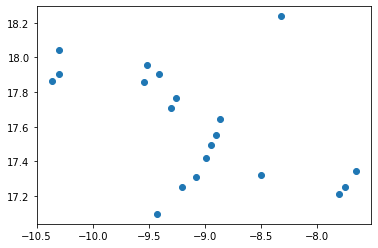

In [38]:
t= True
while t:
    t = fg.continueboolean
    nframe_gen = next(frame_gen)
    fg.predict(nframe_gen) # frame_gen

length is 84


In [94]:
pcap_file_path

'C:/Users/super/OneDrive/Documents/2021/Lidar/bf1VER2.pcap'

In [95]:
# reset frame gen
frame_gen = FrameGen(pcap_file_path,detecting_range,bck_voxel_path,with_bf=False).DBSCAN_pcap_frame_generator(eps,min_samples)

# find a way to find longest trajectory ?
#fg1 = frequency_grid()
#fg2 = frequency_grid()
#fg3 = frequency_grid()

fgs = []

totlen = 20

# start from future frame
future= 20 

for i in range(0, future):
    nframe_gen = next(frame_gen)

print("length of starting frame is", len(nframe_gen))
    
for i in range(0, totlen):
    fgi = frequency_grid()
    fgi.setup_grid()
    fgi.set_first_coordinates(nframe_gen, i)
    fgs.append(fgi)

    
counternums = []

for i in range(0, totlen):
    c = 1
    # reset frame gen 
    # reset frame gen
    frame_gen = FrameGen(pcap_file_path,detecting_range,bck_voxel_path,with_bf=False).DBSCAN_pcap_frame_generator(eps,min_samples)
    
    for j in range(0, future):
        nframe_gen =next(frame_gen)
        
    t = True
    fg1 = fgs[i]
    while t:
        t= fg1.continueboolean
        nframe_gen = next(frame_gen)
        fg1.predict(nframe_gen)
        c=c+1
    counternums.append(c)

# total length of frame gen? 

KeyboardInterrupt: 

In [93]:
counternums

[21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21]

In [99]:
future=10
iclust = 1
# run for 1 starting cluster
c = 1
# reset frame gen
frame_gen = FrameGen(pcap_file_path,detecting_range,bck_voxel_path,with_bf=False).DBSCAN_pcap_frame_generator(eps,min_samples)

for i in range(0, future):
    nframe_gen = next(frame_gen)

t = True

# initialize
fg = frequency_grid()
fg.setup_grid()
#print("length of starting frame is", len(nframe_gen))
fg.set_first_coordinates(nframe_gen, iclust)

while t:
    t= fg.continueboolean
    nframe_gen = next(frame_gen)
    fg.predict(nframe_gen)
    c=c+1
counternums.append(c)

file 2019-8-27-0-0-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-0-30-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-1-0-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-1-30-0-BF1-CL1-Traj(0-18000frames).csv
file 2019-8-27-2-0-0-BF1-CL1-Traj(0-18000frames).csv
found next: key as : 12
cluster found is : 12
found next: key as : 5
cluster found is : 5
found next: key as : 10
cluster found is : 10
found next: key as : 28
cluster found is : 28
found next: key as : 24
cluster found is : 24
found next: key as : 26
cluster found is : 26
found next: key as : 29
cluster found is : 29
found next: key as : 27
cluster found is : 27
found next: key as : 40
cluster found is : 40
found next: key as : 51
cluster found is : 51
did not find next
did not find next


In [100]:
c

13

In [21]:
len(fg.xposition)

6

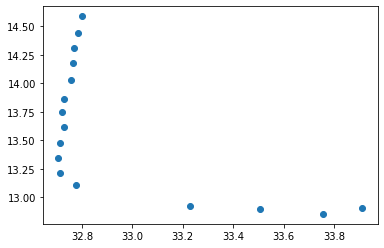

In [25]:
plt.scatter(fg.xposition[0], fg.yposition[0])
plt.show()

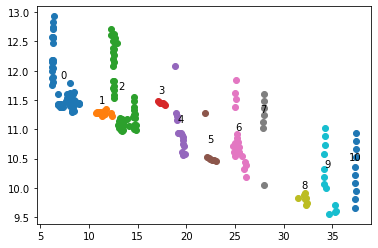

In [101]:
# check by plotting
for i in range(0,len(fg.xposition)):
    plt.scatter(fg.xposition[i],fg.yposition[i])
    avx = np.mean(fg.xposition[i])
    avy = np.mean(fg.yposition[i])
    plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

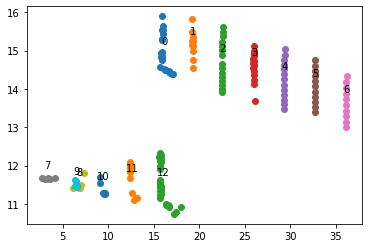

In [73]:
# check by plotting
for i in range(0,len(fg2.xposition)):
    plt.scatter(fg2.xposition[i],fg2.yposition[i])
    avx = np.mean(fg2.xposition[i])
    avy = np.mean(fg2.yposition[i])
    plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [106]:
fg.prevmap

{89015: 1,
 89413: 1,
 89814: 1,
 87814: 1,
 89415: 1,
 89815: 1,
 90214: 1,
 90614: 1,
 91014: 1,
 71014: 1,
 70614: 1,
 70615: 1,
 70213: 1,
 75413: 1,
 75014: 1,
 75813: 1,
 75814: 1,
 75414: 1,
 76213: 1,
 76214: 1,
 76613: 1,
 76614: 1,
 77013: 1,
 77014: 1,
 76212: 1,
 75032: 1,
 75432: 1,
 75832: 1,
 76232: 1,
 76631: 1,
 76632: 1,
 76234: 1}

In [1]:
# plot res

tlen = len(fg.tracking_list)


In [38]:
#import numpy as np
#np.save('my_dtrajcount.npy', dtrajcount)


In [ ]:
# train the dictionary without initialization

# val = prevmap.get(fromi)
# if val ==None:


In [ ]:
# write predict method for hybrid2, hybrid3 


def predict(self, frame_gen, ind): # ind: current index
    # frame gen is 
    next_frame = next(frame_gen)
    #print("len of next frame", len(next_frame))
    lenframe = len(next_frame)
    mf = defaultdict(list)

    mx = lenframe
    for j in range(0, mx):
        mf[j] = 0

    matchfreq = mf
    currentmap3 = {}

    thres = self.thres 
    
    f= 0
    currentmap = {} # temporary currentmap
    currentmap_freq = {} # holds freq scores
    for i in range(0, lenframe):
        ptcloud = next_frame[i].point_cloud
        for p in ptcloud:
            # extract x and y values
            px =p[0]
            py =p[1]
            xvalues.append(px)
            yvalues.append(py)
            print("pc of 0", px)
            xr = round(xpoint)
            yr = round(ypoint)
            fromi = self.backmap[(xr, yr)]
            h1, i1 = self.highestfreq(fromi)
            # save to map
            currentmap[i1] = 1
            currentmap_freq[i1] = h1 
        
            val = self.prevmap.get(fromi)
            if val ==None:
                pass
            else:
                matchfreq[i] = matchfreq[i] +1
        avecurrentx = np.mean(xvalues) ##USE AS CURRENT X
        avecurrenty = np.mean(yvalues)
        currentmap3[numo2] = [avecurrentx, avecurrenty]
        if matchfreq[i] > f:
            ky = i
            hxvalues = xvalues
            hyvalues = yvalues
            totalmap[ky]= currentmap
            
            

        if len(hxvalues)==0:
            foundmin=0
            mindist = thres
            c_first=0
            for c in currentmap3:
                cvalue = currentmap3[c]
                cx = cvalue[0]
                cy = cvalue[1]
                ax = finalx[-1]
                ay = finaly[-1]
                dist1 = pow(cx - ax,2) + pow(cy - ay,2)
                dist = math.sqrt(dist1)
                if dist < thres:
                    if c_first==0:
                        c_first=1
                        minclust=c
                        mcx = cx
                        mcy= cy
                        mindist = dist
                    foundmin=1
                    if dist< mindist:
                        mindist = dist
                        minclust=c
                        mcx = cx
                        mcy = cy
            if foundmin==1:
                print("found min")
                print("dist is", mindist)
                print("minclust is", minclust)
                if len(angles)==0:
                    print("angles array is of length 0 and minclust:", minclust)
                    prevmap = totalmap[minclust]
                    avx = mcx
                    avy = mcy 
                    finalarray.append(minclust)
                    # add to angles
                    xdiff = avx - finalx[-1]
                    ydiff = avy - finaly[-1]
                    rad = math.atan2(ydiff, xdiff)
                    ang = math.degrees(rad)
                    if ang<0:
                        ang = 360+ang
                    angles.append(ang)
                    
                    finalx.append(mcx)
                    finaly.append(mcy)
                    
                    continue
                prev= self.tracking_list[-1]
                prev_avex= prev[0]
                prev_avey= prev[1]
                xdiff_curr = mcx - prev_avex #how is avx set?
                ydiff_curr = mcy - prev_avey 
                # calc angle
                rad = math.atan2(ydiff_curr, xdiff_curr)
                
                ang = math.degrees(rad)
                if ang<0:
                    ang = 360+ang
                    
                prev_ang = self.angles[-1]
                ang_diff = abs(ang - prev_ang)
                if ang_diff <= 30: # change from 45 to 30
                    print("angle holds")
                    prevmap= totalmap[minclust]
                    avx = mcx
                    avy =mcy
                    finalarray.append(minclust)
                    finalx.append(mcx)
                    finaly.append(mcy)
                    # append to slopes / diffs
                    #xdiff.append(avx - avex[-1])
                    #ydiff.append(avy - avey[-1])
                    #avex.append(avx)
                    #avey.append(avy)
                    #append to angles
                    angles.append(ang)
                else:
                    print("angles too large, stop")
                    break
                
                
        else:
            # return ky
            self.trackinglist[ind] = ky 
            return ky
                

In [4]:
# linear sum assignment
from scipy.optimize import linear_sum_assignment

# input: cost matrix 

# cost is the reciprocal of the frequency or negative of frequency ?



In [2]:
import numpy as np
# test lin sum assignment
cost = np.array([[4, 1, 3], [2, 0, 5], [3, 2, 2]])


In [6]:
cost2 = np.array([[0, 1, 3], [2, 0, 5], [3, 2, 0]])

In [10]:
# test vstack
A = [1,2,1]
newrow = [0,5,4]
np.vstack([A, newrow])

array([[1, 2, 1],
       [0, 5, 4]])

In [3]:
cost

array([[4, 1, 3],
       [2, 0, 5],
       [3, 2, 2]])

In [5]:
row_ind, col_ind = linear_sum_assignment(cost)

In [7]:
row_ind

array([0, 1, 2], dtype=int64)

In [8]:
r2, c2 = linear_sum_assignment(cost2)

In [9]:
c2

array([0, 1, 2], dtype=int64)

In [ ]:
# for each row: calculate the frequency from that row to each cluster in next frame
